# HSE 2024: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 
Loops are only allowed in part 1 (Tasks 1 - 4). 
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task. 

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# 1. Python (2 points) 

**Task 1** (0.5 points)<br/> 
Enter nonzero numbers `a`,  `r` and `N`. Find the first `N` members of geometric progression with the first member `a` and factor `r`, without using formula for the product.

In [3]:
def find_product(a, r, N):
    # return [a * r ** i for i in range(N)]
    # however we will recalculate r**(i - 1) each iteration
    res = [a]
    for _ in range(1, N):
        res.append(res[-1] * r)
    return res


a = 2
r = 3
N = 3
print(find_product(a, r, N))

[2, 6, 18]


**Task 2** (0.5 points) <br/> 
Enter an integer number `N`. Check if it is a palindrome number. It means that it can be read equally from left to right and from right to back. 

In [4]:
def check_palindrome(N):
    if not isinstance(N, str):
        N = str(N)
    for i in range(len(N) // 2):
        if N[i] != N[-i - 1]:
            return False
    return True


for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Task 3** (0.5 points) <br/> 
Find the first `N` palindrome numbers starting from 1000 (you may use the function from the precious task).

In [5]:
def find_palindromes(N):
    res = []
    cur = 1000
    while len(res) < N:
        if check_palindrome(cur):
            res.append(cur)
        cur += 1
    return res

print(find_palindromes(5))
print(find_palindromes(10))
print(find_palindromes(20))

[1001, 1111, 1221, 1331, 1441]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991, 2002, 2112, 2222, 2332, 2442, 2552, 2662, 2772, 2882, 2992]


**Task 4** (0.5 points) <br/> 
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the minimum number.

In [6]:
from random import randint
def find_min(a, b, c):
    if b > c:
        b, c = c, b
    if a > b:
        a, b = b, a
    return a

for i in range(10):
    
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)
    
    print(a, b, c, '\tMinimum:', find_min(a, b, c))

1 16 80 	Minimum: 1
-29 -53 65 	Minimum: -53
-17 -86 18 	Minimum: -86
96 69 1 	Minimum: 1
25 -10 59 	Minimum: -10
-73 91 -77 	Minimum: -77
5 -80 54 	Minimum: -80
94 -8 -19 	Minimum: -19
-42 92 66 	Minimum: -42
-11 -14 89 	Minimum: -14


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array (`np.random.rand()`) with length of 17 and with sum of its elements equals to 6.

In [7]:
my_array = np.random.rand(17)
my_array = my_array / sum(my_array) * 6
print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')

Length: 17
Sum of elements: 6.0


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length. 

Calculate the following distances between the arrays **without using special funcrion. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [8]:
def calculate_manhattan(a, b):
    return np.sum(np.abs(a - b))


def calculate_euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


def calculate_chebyshev(a, b):
    return np.max(np.abs(a - b))


def calculate_cosine(a, b):
    return 1 - (a.T @ b) / (np.linalg.norm(a) * np.linalg.norm(b))

In [9]:
a = np.random.randn(15)
b = np.random.randn(15)
print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

Manhattan distance: 23.346776366977046
Euclidean distance: 7.408191667112351
Chebyshev distance: 4.496300105024305
Cosine distance: 1.6127221070200362


**Task 3** (0.5 points) <br/>
Create a random array (`np.random.randint()`) with length of 76. Transform the array so that 
* Maximum element(s) value is -1
* Minimum element(s) value is -4
* Other values are in interval (-4; -1) with keeping the order

In [10]:
def transform(array):
    max_val, min_val = np.max(array), np.min(array)
    return (array - min_val) * 3 / (max_val - min_val) - 4

In [11]:
my_array = np.random.randint(100, size=76)
my_array = transform(my_array)
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array:')
print(my_array)

Min: -4.0
Max: -1.0
Array:
[-2.87096774 -1.87096774 -1.         -1.09677419 -1.41935484 -1.
 -2.06451613 -1.80645161 -2.58064516 -1.32258065 -2.48387097 -1.67741935
 -1.87096774 -2.16129032 -3.22580645 -2.93548387 -2.03225806 -1.4516129
 -2.67741935 -2.93548387 -3.64516129 -3.87096774 -2.64516129 -3.03225806
 -4.         -2.19354839 -2.38709677 -1.16129032 -2.51612903 -2.32258065
 -3.93548387 -3.35483871 -3.87096774 -2.90322581 -2.51612903 -2.80645161
 -1.19354839 -1.32258065 -3.35483871 -3.61290323 -2.90322581 -1.74193548
 -1.4516129  -4.         -1.67741935 -4.         -3.64516129 -3.35483871
 -1.61290323 -3.96774194 -2.22580645 -2.06451613 -3.77419355 -1.83870968
 -3.32258065 -2.38709677 -1.93548387 -3.35483871 -3.22580645 -3.38709677
 -3.5483871  -2.09677419 -1.12903226 -2.32258065 -2.09677419 -2.61290323
 -1.93548387 -2.67741935 -1.         -1.51612903 -1.93548387 -3.77419355
 -3.96774194 -3.41935484 -3.90322581 -1.51612903]


**Task 4** (0.5 points) <br/>
Create an array with shape of $8 \times 5$ with integers from [-7, 43]. Print a column that contains the maximum element of the array.

In [12]:
my_array = np.random.randint(low=-7, high=44, size=(8, 5))
selected_column = np.argmax(np.max(my_array, axis=1))
print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column: {my_array[selected_column]}')

Shape:  (8, 5)
Array:
[[ 6 14 11 39 33]
 [ 7 34 34  3 37]
 [17 -7 42 25 42]
 [-7 14 -2 34  9]
 [-3 32 11 -7 19]
 [16 42 42 22 27]
 [ 5 42 39 -7  2]
 [41 14 24  9 35]]
Selected column: [17 -7 42 25 42]


**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with median.

In [13]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

Array:
[       nan 0.43889739        nan        nan 0.86611403 0.95752463
        nan 0.41738819 0.81888784 0.98146729]


In [14]:
def replace_missing(arr):
    ## Your code here
    median_value = np.nanmedian(arr)
    return np.where(np.isnan(arr), median_value, arr)

In [15]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)

Array with no missing values:
[0.84250093 0.43889739 0.84250093 0.84250093 0.86611403 0.95752463
 0.84250093 0.41738819 0.81888784 0.98146729]


**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the mean for all 3 channels (a vector of shape 3).

In [16]:
def mean_channel(X):
    return np.mean(X, axis=(0, 1))

In [17]:
n = 19
m = 23
X =  np.random.randint(-11, 8, size=(n, m, 3))
print(f'Vector of means: {mean_channel(X)}')

Vector of means: [-1.86270023 -2.5423341  -1.96796339]


### **Task 7** (1 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique vertical (first axis) layers.

Sample input:

     ([[[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]
        [4, 5, 6]],

       [[7, 8, 9],
        [7, 8, 9]
        [7, 8, 9]]])
        
Sample output:

     ([[[1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]],

       [[7, 8, 9],
        [7, 8, 9]]])

In [18]:
def get_unique_rows(X):
    return np.unique(X, axis=1)

In [19]:
X = np.random.randint(4, 6, size=(n, 3, 3))
X = np.array(
    [
        [[1, 2, 3], [1, 2, 3], [1, 2, 3]],
        [[4, 5, 6], [4, 5, 7], [4, 5, 6]],
        [[7, 8, 9], [7, 8, 9], [7, 8, 9]],
    ]
)
print("Matrix:")
print(X)
print("Unique rows:")
get_unique_rows(X)

Matrix:
[[[1 2 3]
  [1 2 3]
  [1 2 3]]

 [[4 5 6]
  [4 5 7]
  [4 5 6]]

 [[7 8 9]
  [7 8 9]
  [7 8 9]]]
Unique rows:


array([[[1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]],

       [[7, 8, 9],
        [7, 8, 9]]])

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task wont't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 5 rows

In [20]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What what the least popular port of embarkation?
    * How many classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every class?
Please, write not only the answers but the code, proving it.

# Answers:

1. There are 177 missing values in Age column, 687 missing values in Cabin column, and 2 missing values in Embarked column.
2. Probability of survival: 0.3838383838383838, classes are slightly imbalanced
3. There are more males
4. Q
5. 3
6. - Fare mean: 32.204207968574636
    - Fare mean for 1st class: 84.1546875
    - Fare mean for 2nd class: 20.662183152173913
    - Fare mean for 3rd class: 13.675550101832993

In [21]:
# 1
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
# 2
df['Survived'].mean()

0.3838383838383838

In [23]:
# 3
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [24]:
# 4
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [25]:
# 5
len(df['Pclass'].unique())

3

In [26]:
# 6
df['Fare'].mean()

32.204207968574636

In [27]:
# 6

print('Fare mean:', df['Fare'].mean())
df.groupby('Pclass')['Fare'].mean()

Fare mean: 32.204207968574636


Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

**Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example). 

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the mean age? And among males and females sepatately? Visualize it on the plot
    * Make conclusions about what you see on the plot

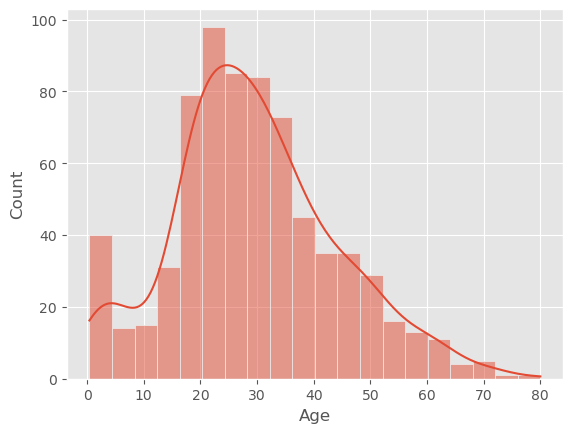

In [28]:
sns.histplot(x='Age', data=df, kde=True);

**Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    1. How many are there unique titles?
    2. How many are there passengers with every title?
    3. What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot.

**Answers:**
1. 17
2. see below
3. Mr for male, Miss for female

In [29]:
def get_title(name):
    return name.split(',')[1].split('.')[0].strip(
        
    )

titles = df['Name'].apply(get_title).unique()
print(titles)
print('There are ', len(titles), 'unique titles in the dataset')

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
There are  17 unique titles in the dataset


In [30]:
df['Name'].map(get_title).value_counts()

Name
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [31]:
df.query('Sex == "male"')['Name'].map(get_title).value_counts()

Name
Mr          517
Master       40
Rev           6
Dr            6
Major         2
Col           2
Don           1
Sir           1
Capt          1
Jonkheer      1
Name: count, dtype: int64

In [32]:
df.query('Sex == "female"')['Name'].map(get_title).value_counts()

Name
Miss            182
Mrs             125
Mlle              2
Mme               1
Ms                1
Lady              1
the Countess      1
Dr                1
Name: count, dtype: int64

**Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each port and visualize price distribution for each port. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). main point here is to **choose** plots wisely and **make meaningful conclusions**

# Answers:
1. It's easy to notice that 'Pclass' and 'Fare' are correlated.
2. 'Embarked' and 'Fare' are also highly correlated. For each port, price distribution is similar to exponential distribution


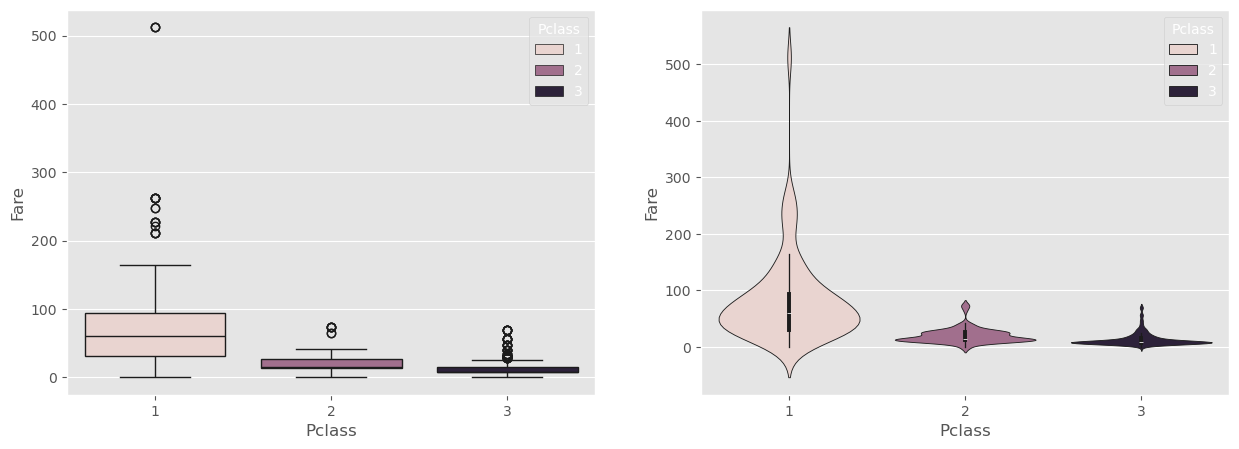

In [40]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Pclass', y='Fare', data=df, hue='Pclass');
plt.subplot(1, 2, 2)
sns.violinplot(x='Pclass', y='Fare', data=df, hue='Pclass');

In [35]:
# mean price for each port

df.groupby('Embarked')['Fare'].mean()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

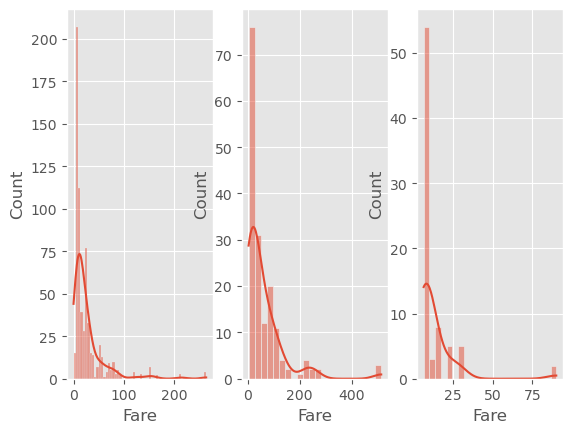

In [36]:
# price distribution for each port

plt.subplot(1, 3, 1)
sns.histplot(x='Fare', data=df.where(df['Embarked'] == 'S'), kde=True);
plt.subplot(1, 3, 2)
sns.histplot(x='Fare', data=df.where(df['Embarked'] == 'C'), kde=True);
plt.subplot(1, 3, 3)
sns.histplot(x='Fare', data=df.where(df['Embarked'] == 'Q'), kde=True);

**Task 5** (0.5 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

# Answers:
1. Clear correlation

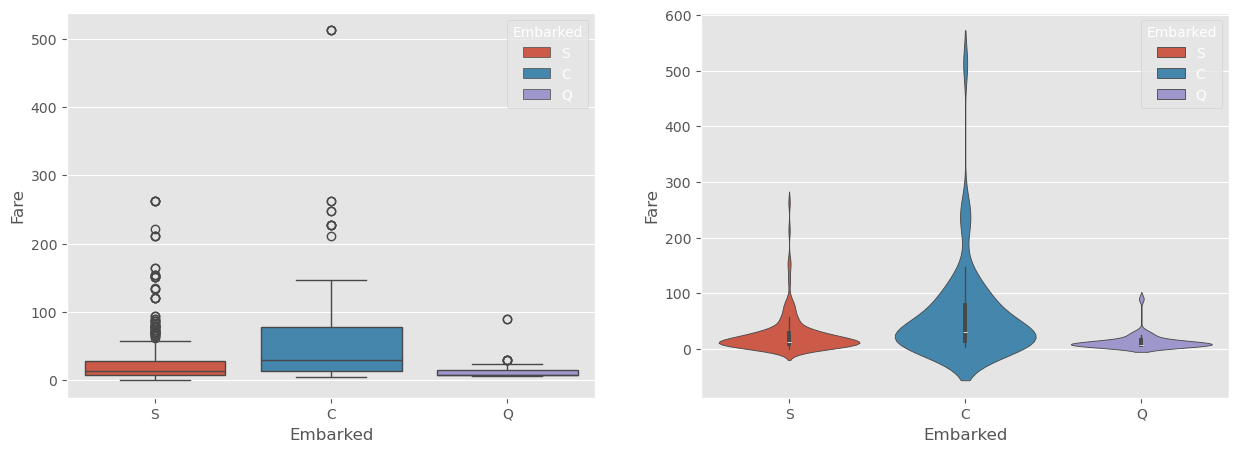

In [43]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Embarked', y='Fare', data=df, hue='Embarked');
plt.subplot(1, 2, 2)
sns.violinplot(x='Embarked', y='Fare', data=df, hue='Embarked');

**Task 6** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

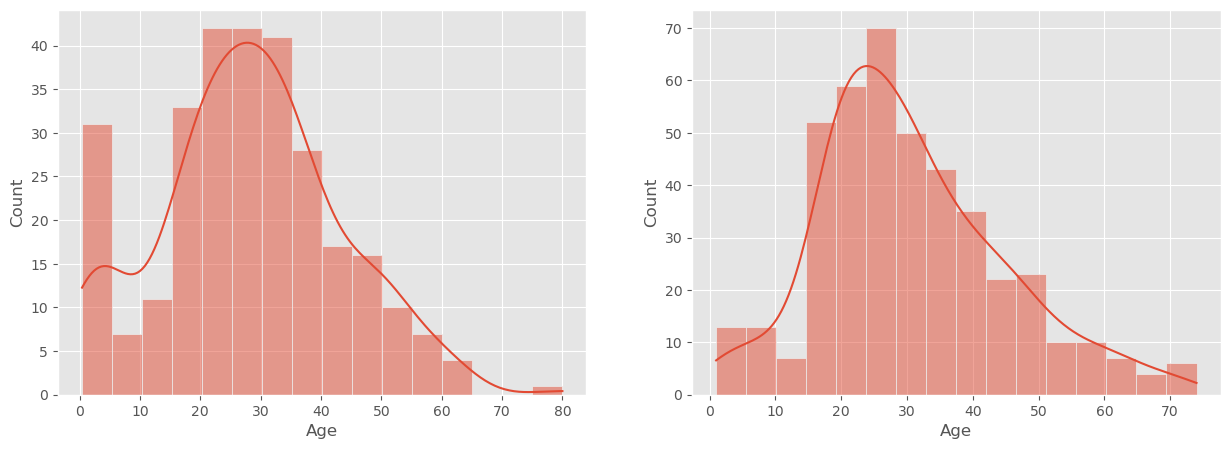

In [47]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(x='Age', data=df.where(df['Survived'] == 1), kde=True)
plt.subplot(1, 2, 2)
sns.histplot(x='Age', data=df.where(df['Survived'] == 0), kde=True)

df.groupby('Survived')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

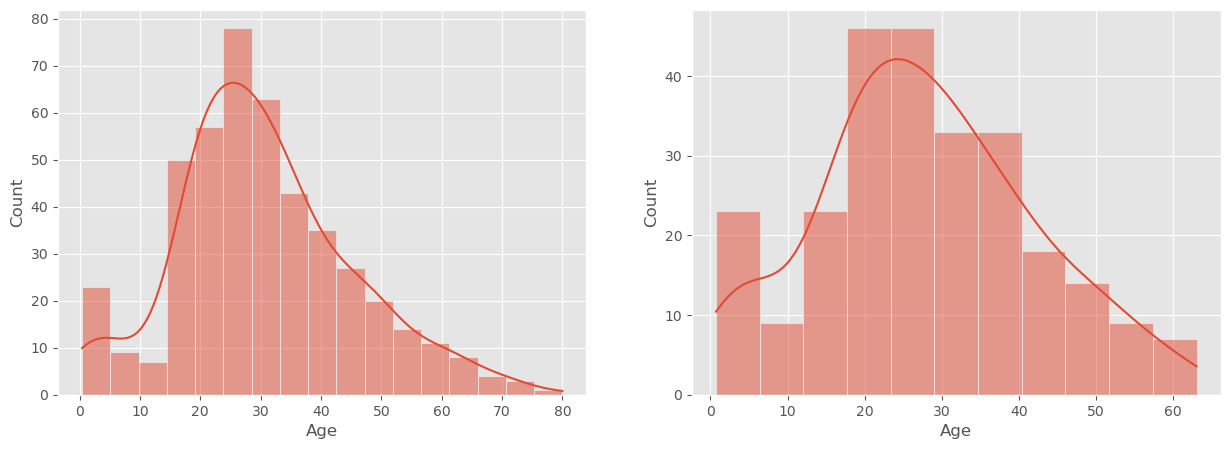

In [48]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(x='Age', data=df.where(df['Sex'] == 'male'), kde=True)
plt.subplot(1, 2, 2)
sns.histplot(x='Age', data=df.where(df['Sex'] == 'female'), kde=True)

df.groupby('Sex')['Age'].mean()